In [31]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

from google.colab import drive

drive.mount('/content/gdrive')

data_dir = "gdrive/My Drive/Colab Notebooks/Lab 4/vehicles_images"
NewV_data = "gdrive/My Drive/Colab Notebooks/Lab 4/New Vehicle Data"                                                       

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
batch_size = 32
img_height = 160
img_width = 160

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #in this place, 30% is used for validation while 70% is used for training.
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

newv_dt = tf.keras.preprocessing.image_dataset_from_directory(
  NewV_data,
  # validation_split=0.2,
  # subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)


Found 4318 files belonging to 4 classes.
Using 3455 files for training.
Found 4318 files belonging to 4 classes.
Using 863 files for validation.
Found 20 files belonging to 4 classes.
['bus', 'motorcycle', 'plane', 'train']


(32, 160, 160, 3)
(32,)


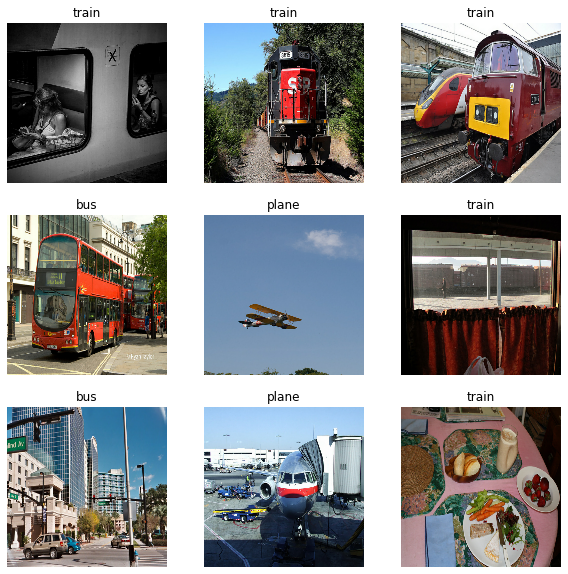

In [33]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

num_classes = len(class_names)


0.014215687 0.99705887


In [36]:
#Defining the Conv2D parameter by changing the stride size and filters and kernel
tf.keras.layers.Conv2D(
    filters = 3,
    kernel_size = 3,
    strides = (2,2),
    padding = 'valid',
    data_format = None,
    dilation_rate = (1,1),
    groups = 1,
    activation = None,
    use_bias = True,
    kernel_initializer = 'glorot_uniform',
    bias_initializer = 'zeros',
    activity_regularizer = None,
    kernel_constraint = None,
    bias_constraint = None,
)

Difference bwtween Average and Max pooling

In [37]:
# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.AveragePooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.AveragePooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.AveragePooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

In [38]:
# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

In [39]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 160, 160, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 160, 160, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 80, 80, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 80, 80, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 40, 64)       

In [40]:
%%time
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Epoch 1/10
108/108 [==============================] - 9s 77ms/step - loss: 1.2381 - accuracy: 0.4252 - val_loss: 1.0928 - val_accuracy: 0.5342
Epoch 2/10
108/108 [==============================] - 5s 42ms/step - loss: 1.0947 - accuracy: 0.5401 - val_loss: 0.9989 - val_accuracy: 0.5782
Epoch 3/10
108/108 [==============================] - 5s 42ms/step - loss: 1.0228 - accuracy: 0.5742 - val_loss: 1.0858 - val_accuracy: 0.5377
Epoch 4/10
108/108 [==============================] - 5s 42ms/step - loss: 0.9437 - accuracy: 0.6255 - val_loss: 1.0019 - val_accuracy: 0.5979
Epoch 5/10
108/108 [==============================] - 5s 42ms/step - loss: 0.8956 - accuracy: 0.6446 - val_loss: 0.9160 - val_accuracy: 0.6489
Epoch 6/10
108/108 [==============================] - 5s 42ms/step - loss: 0.8287 - accuracy: 0.6802 - val_loss: 0.9039 - val_accuracy: 0.6408
Epoch 7/10
108/108 [==============================] - 5s 42ms/step - loss: 0.7685 - accuracy: 0.7004 - val_loss: 0.9241 - val_accuracy: 0.6304

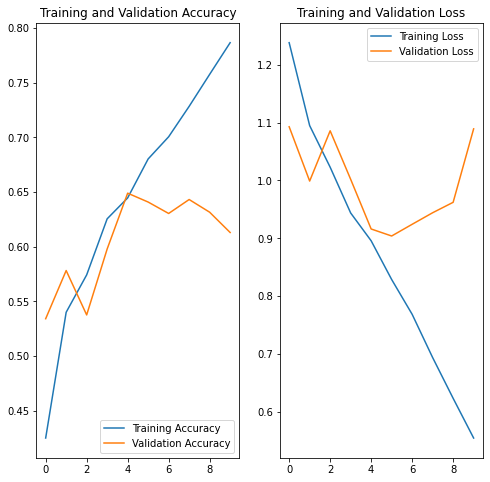

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(32, 160, 160, 3)
(32,)
CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 127 ms


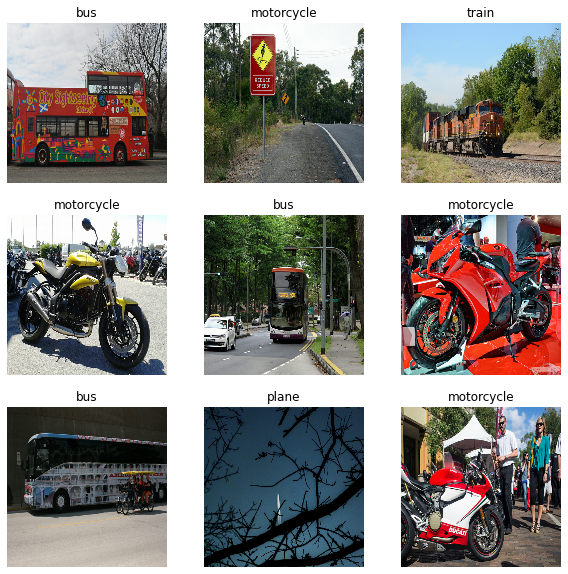

In [42]:
%%time
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

IMAGE NET

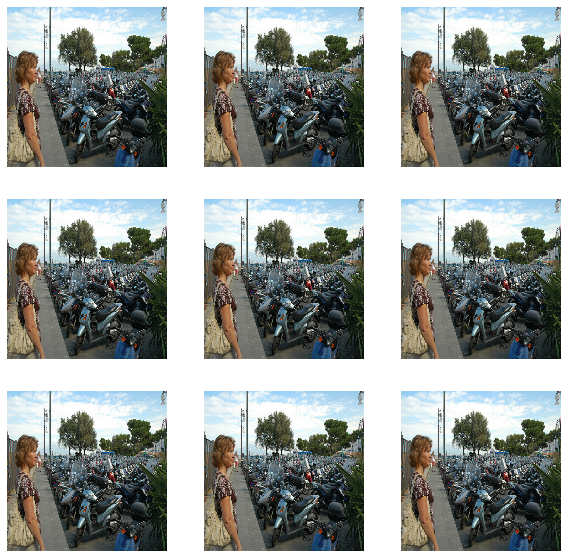

In [43]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [44]:
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [45]:
base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(4)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [46]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [47]:
%%time
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x= global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001 # can be chan ged to get a faster or slower learning rate.
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

len(model.trainable_variables)

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


27/27 [==============================] - 2s 27ms/step - loss: 1.4739 - accuracy: 0.3615
initial loss: 1.47
initial accuracy: 0.36
CPU times: user 2.94 s, sys: 114 ms, total: 3.05 s
Wall time: 3.47 s


In [48]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
108/108 [==============================] - 6s 32ms/step - loss: 1.4807 - accuracy: 0.3835 - val_loss: 0.9719 - val_accuracy: 0.6466
Epoch 2/10
108/108 [==============================] - 3s 32ms/step - loss: 1.1266 - accuracy: 0.5329 - val_loss: 0.7574 - val_accuracy: 0.7451
Epoch 3/10
108/108 [==============================] - 3s 32ms/step - loss: 0.9511 - accuracy: 0.6275 - val_loss: 0.6547 - val_accuracy: 0.7740
Epoch 4/10
108/108 [==============================] - 3s 32ms/step - loss: 0.8700 - accuracy: 0.6564 - val_loss: 0.6039 - val_accuracy: 0.7937
Epoch 5/10
108/108 [==============================] - 3s 32ms/step - loss: 0.7971 - accuracy: 0.6839 - val_loss: 0.5693 - val_accuracy: 0.8030
Epoch 6/10
108/108 [==============================] - 3s 32ms/step - loss: 0.7718 - accuracy: 0.7016 - val_loss: 0.5475 - val_accuracy: 0.8065
Epoch 7/10
108/108 [==============================] - 3s 32ms/step - loss: 0.7509 - accuracy: 0.7085 - val_loss: 0.5388 - val_accuracy: 0.8088

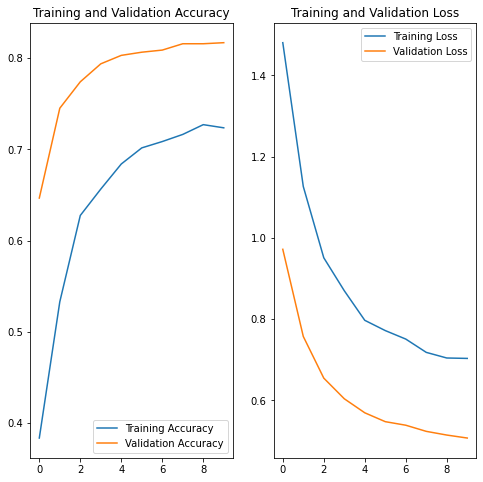

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
base_model.trainable = True
base_model.summary()

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [51]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10), #optimizer changed to Adam to see if accuracy increases.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
%%time
initial_epochs = 10
fine_tune_epochs = 20 #fine_tune epochs increased to 20.
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)


Epoch 10/30
108/108 [==============================] - 10s 51ms/step - loss: 0.6538 - accuracy: 0.7444 - val_loss: 0.5030 - val_accuracy: 0.8123
Epoch 11/30
108/108 [==============================] - 5s 44ms/step - loss: 0.6044 - accuracy: 0.7641 - val_loss: 0.4924 - val_accuracy: 0.8181
Epoch 12/30
108/108 [==============================] - 5s 43ms/step - loss: 0.5682 - accuracy: 0.7884 - val_loss: 0.4643 - val_accuracy: 0.8366
Epoch 13/30
108/108 [==============================] - 5s 43ms/step - loss: 0.5306 - accuracy: 0.7902 - val_loss: 0.4739 - val_accuracy: 0.8250
Epoch 14/30
108/108 [==============================] - 5s 44ms/step - loss: 0.5196 - accuracy: 0.8006 - val_loss: 0.4788 - val_accuracy: 0.8273
Epoch 15/30
108/108 [==============================] - 5s 44ms/step - loss: 0.5111 - accuracy: 0.8058 - val_loss: 0.4553 - val_accuracy: 0.8297
Epoch 16/30
108/108 [==============================] - 5s 43ms/step - loss: 0.4791 - accuracy: 0.8174 - val_loss: 0.4589 - val_accuracy

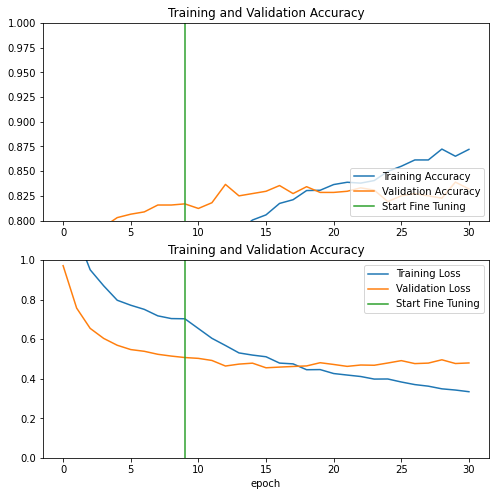

108/108 [==============================] - 3s 24ms/step - loss: 0.2710 - accuracy: 0.9025
Test accuracy:  0.9024602174758911
CPU times: user 1.88 s, sys: 92.4 ms, total: 1.98 s
Wall time: 2.95 s


In [53]:
%%time
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

loss, accuracy = model.evaluate(train_ds)
print('Test accuracy: ', accuracy)

In [54]:
%%time
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x= global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001 # can be chan ged to get a faster or slower learning rate.
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

len(model.trainable_variables)

initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=newv_dt)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_3 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_3 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


27/27 [==============================] - 3s 27ms/step - loss: 0.4799 - accuracy: 0.8320
initial loss: 0.48
initial accuracy: 0.83
Epoch 1/10
108/108 [==============================] - 7s 38ms/step - loss: 0.5101 - accuracy: 0.8072 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 2/10
108/108 [==============================] - 4s 37ms/step - loss: 0.4479 - accuracy: 0.8287 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 3/10
108/108 [==============================] - 4s 37ms/step - loss: 0.4262 - accuracy: 0.8405 - val_loss: 0.0812 - val_accuracy: 0.9500
Epoch 4/10
108/108 [==============================] - 4s 37ms/step - loss: 0.3993 - accuracy: 0.8452 - val_loss: 0.1090 - val_accuracy: 0.9500
Epoch 5/10
108/108 [==============================] - 4s 37ms/step - loss: 0.3621 - accuracy: 0.8570 - val_loss: 0.0733 - val_accuracy: 0.9500
Epoch 6/10
108/108 [==============================] - 4s 37ms/step - loss: 0.3200 - accuracy: 0.8848 - val_loss: 0.0864 - val_accuracy: 0.9500
Epoch 7/10
1

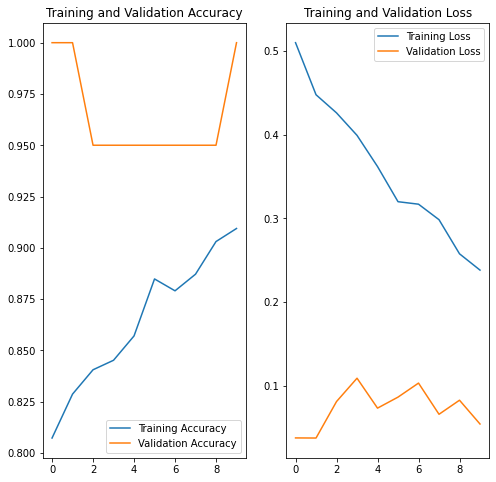

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
base_model.trainable = True
base_model.summary()

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [57]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [58]:
%%time
initial_epochs = 10
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=newv_dt)

Epoch 10/20
108/108 [==============================] - 10s 49ms/step - loss: 0.1564 - accuracy: 0.9450 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 11/20
108/108 [==============================] - 4s 39ms/step - loss: 0.1379 - accuracy: 0.9476 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 12/20
108/108 [==============================] - 4s 39ms/step - loss: 0.1415 - accuracy: 0.9456 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 13/20
108/108 [==============================] - 4s 39ms/step - loss: 0.1216 - accuracy: 0.9577 - val_loss: 0.0652 - val_accuracy: 0.9500
Epoch 14/20
108/108 [==============================] - 4s 39ms/step - loss: 0.1192 - accuracy: 0.9546 - val_loss: 0.0610 - val_accuracy: 0.9500
Epoch 15/20
108/108 [==============================] - 4s 39ms/step - loss: 0.1158 - accuracy: 0.9580 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 16/20
108/108 [==============================] - 4s 39ms/step - loss: 0.1138 - accuracy: 0.9589 - val_loss: 0.0526 - val_accuracy

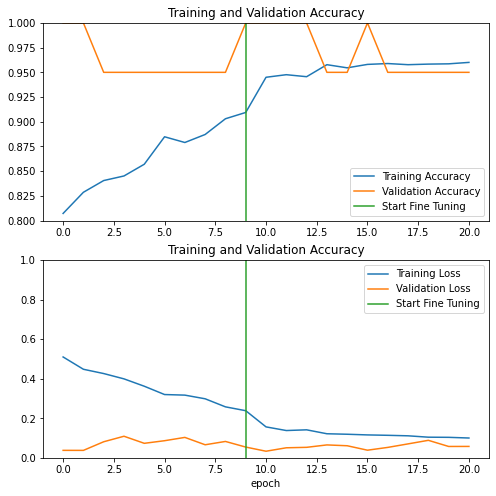

CPU times: user 301 ms, sys: 14.4 ms, total: 316 ms
Wall time: 304 ms


In [59]:
#This is for newv_dt - new 20 images.
%%time
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1, initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()


In [60]:
loss, accuracy = model.evaluate(newv_dt)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 62ms/step - loss: 0.0575 - accuracy: 0.9500
Test accuracy : 0.949999988079071


Predictions:
 [1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 0 1 0]
Labels:
 [3 3 1 2 0 3 2 1 0 0 1 2 3 1 0 0 3 2 1 2]


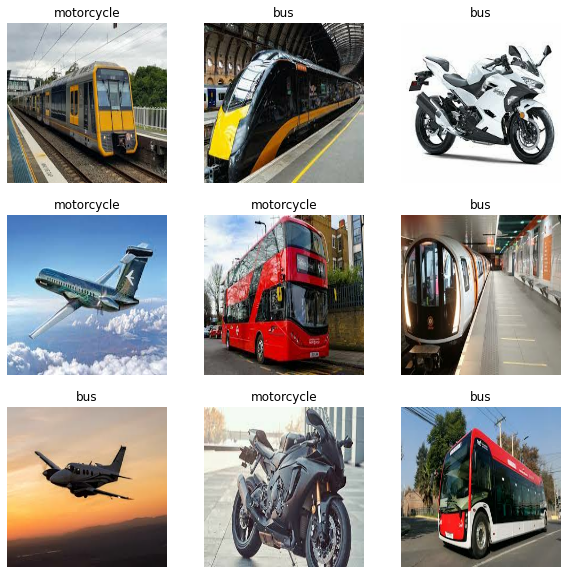

In [61]:
# Retrieve a batch of images from the test set
image_batch, label_batch = newv_dt.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")